<h3><b>

• Ajay prudhvi Kalidasu - 500187692

• Harpreet kaur Dounshi - 500187865

• Sai sourabh Cherukupally - 500194560

• Vimala Ponnambalam - 500188738

• Yashaswini Tangirala – 500192762


<h3><b><u>TASK</u> <br>
<b>2 - implement one classification method you have learned using python.

https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/

A LATER task- compare the results to conclude the accuracy of each - you may use confusion matrix to compare or any other methods ( research online for this).



Dataset: use kaggle.com 

https://www.kaggle.com/uciml/iris

**Adding Libraries for analysis**

In [1]:

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import svm


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
titanic = pd.read_csv('C:\DS&AI\Vimala\Python\ML-1\Titanic_data.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<b>There are missing values in Age, Embarked and Cabin. 

Age is a continuous variable, so missing values should be replaced with mean/median

Embraked is a categorical Variable, so it should be replaced with mode

Cabin is not a categorical/numeric variable. 

Non-Numerical Columns:Name, ticket & cabin should be dropped

Categorical Columns : Age,Gender, Embarked should be converted to numeric

In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<b>Replacing Age with mean value

In [4]:
print('Nan values before changes',titanic['Age'].isna().sum())
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
print('Nan values after changes',titanic['Age'].isna().sum())
#titanic['Age']=titanic['Age'].apply(pd.to_numeric)

Nan values before changes 177
Nan values after changes 0


<b> Replacing Embarked with mode 

In [5]:
print('Nan values before changes',titanic['Embarked'].isna().sum())
print(titanic['Embarked'].value_counts())
print(titanic['Embarked'].unique())
titanic['Embarked'].fillna(sts.mode(titanic['Embarked']),inplace=True)
print('Nan values after changes',titanic['Embarked'].isna().sum())


Nan values before changes 2
S    644
C    168
Q     77
Name: Embarked, dtype: int64
['S' 'C' 'Q' nan]
Nan values after changes 0


<b> Converting Categorical independent variable to Numeric

In [6]:
lb_make=LabelEncoder()
titanic['Gender']=lb_make.fit_transform(titanic['Sex'])
titanic['Embarked']=lb_make.fit_transform(titanic['Embarked'])


In [7]:
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic['Title'] = titanic['Title'].replace(['Countess','Mlle','Sir','Lady','Ms','Mme'], 1)
titanic['Title'] = titanic['Title'].replace(['Mrs','Miss','Master'], 2)
titanic['Title'] = titanic['Title'].replace(['Mr','Dr','Major','Col','Capt','Jonkheer','Don','Rev'], 0)

<b> Dropping non numerical features from the dataframe

In [8]:
titanic.drop(['Name','Sex','Ticket','Cabin'],axis=1,inplace=True)

In [9]:
target=titanic['Survived']
titanic.drop(['Survived'],inplace=True,axis=1)
titanic.insert(9,'Target',target)

In [10]:
titanic.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender,Title,Target
0,1,3,22.0,1,0,7.2500,2,1,0,0
1,2,1,38.0,1,0,71.2833,0,0,2,1
2,3,3,26.0,0,0,7.9250,2,0,2,1
3,4,1,35.0,1,0,53.1000,2,0,2,1
4,5,3,35.0,0,0,8.0500,2,1,0,0


In [11]:
titanic['Target'].value_counts()

0    549
1    342
Name: Target, dtype: int64

**Applying Logistic Regression and plotting confusion Matrix**

**Dropped Pasenger ID as it is not useful for analysis**

In [12]:
titanic1=titanic.drop(['PassengerId'],axis=1)
titanic1.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender,Title,Target
0,3,22.0,1,0,7.2500,2,1,0,0
1,1,38.0,1,0,71.2833,0,0,2,1
2,3,26.0,0,0,7.9250,2,0,2,1
3,1,35.0,1,0,53.1000,2,0,2,1
4,3,35.0,0,0,8.0500,2,1,0,0


**No significant change in accuarcy, performing further EDA**

Removing Fare, as we already have passenger class

In [13]:
titanic2=titanic1.drop(['Fare'],axis=1)
titanic2.head()

,Pclass,Age,SibSp,Parch,Embarked,Gender,Title,Target
0,3,22.0,1,0,2,1,0,0
1,1,38.0,1,0,0,0,2,1
2,3,26.0,0,0,2,0,2,1
3,1,35.0,1,0,2,0,2,1
4,3,35.0,0,0,2,1,0,0


**No Significant change in accuracy, so continuing with EDA**
**Since Sib and Parch are both related to accompanied passengers we are combining both**

In [14]:
titanic2['accompanied']=titanic2['SibSp']+titanic2['Parch']
titanic2['accompanied'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: accompanied, dtype: int64

We are simplyfying the accompanied collumn to 1 if accompanied and 0 if not accompanied

In [15]:
titanic2.loc[titanic2['accompanied'] > 0] = 1
titanic2['accompanied'].value_counts()

0    537
1    354
Name: accompanied, dtype: int64

Dropping the 'SibSp','Parch' as new column was created

In [17]:
titanic3=titanic2.drop(['SibSp','Parch'],axis=1)

In [18]:
#temp=titanic3.drop(['accompanied'])

target=titanic3['accompanied']
titanic3.drop(['accompanied'],inplace=True,axis=1)
titanic3.insert(0,'accompanied',target)


Getting the title of the passenger and replacing it with categorical variables

In [19]:
titanic3['Title'] = titanic3['Title'].replace(['Mrs','Miss','Master'], 0)
titanic3.head()

,accompanied,Pclass,Age,Embarked,Gender,Title,Target
0,1,1,1.0,1,1,1,1
1,1,1,1.0,1,1,1,1
2,0,3,26.0,2,0,2,1
3,1,1,1.0,1,1,1,1
4,0,3,35.0,2,1,0,0


In [22]:
import matplotlib.pyplot as plt
def logsitic_reg(df):
    regr_model=LogisticRegression(max_iter=500)
    #x_train,x_test,y_train,y_test=np.array()
    x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1].values,df.iloc[:,-1:].values,test_size=0.2,random_state=6)
    print('features',df.columns[:-1],'\n')
    print("Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train\t: ",df.shape,x_train.shape, x_test.shape,y_train.shape,y_test.shape)
    y_train=y_train.ravel()
    y_test=y_test.ravel()
    regr_model.fit(x_train, y_train)
    y_predict = regr_model.predict(x_test)
    
    acc = accuracy_score(y_predict,y_test)
    cm=confusion_matrix(y_predict,y_test)
    report=classification_report(y_test, y_predict, digits=3)

    



    labels =['Class 0', 'Class 1']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix ')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()
    
    print('accuracy:',acc)
    print(cm)
    print(report)  

features Index(['accompanied', 'Pclass', 'Age', 'Embarked', 'Gender', 'Title'], dtype='object') 

Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train	:  (891, 7) (712, 6) (179, 6) (712, 1) (179, 1)


<ipython-input-22-95cd1bfbdd04>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-22-95cd1bfbdd04>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


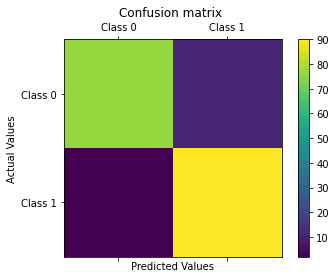

accuracy: 0.9273743016759777
[[76 11]
 [ 2 90]]
              precision    recall  f1-score   support

           0      0.874     0.974     0.921        78
           1      0.978     0.891     0.933       101

    accuracy                          0.927       179
   macro avg      0.926     0.933     0.927       179
weighted avg      0.933     0.927     0.928       179



In [23]:
logsitic_reg(titanic3)

In [24]:
titanic3.columns

Index(['accompanied', 'Pclass', 'Age', 'Embarked', 'Gender', 'Title',
       'Target'],
      dtype='object')

<h3><b> SPOT Check ALGORITHM

In [28]:
# Spot Check Algorithms

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

x_train,x_test,y_train,y_test=train_test_split(titanic3.iloc[:,:-1].values,titanic3.iloc[:,-1:].values,test_size=0.2,random_state=6)
models = []
#regr_model=LogisticRegression(max_iter=500)
#models.append(('LR', LogisticRegression(max_iter=500)))
#models.append(('LR-liblinar', LogisticRegression(solver='liblinear', multi_class='ovr',max_iter=10000)))
models.append(('LR-sag', LogisticRegression(solver='sag', multi_class='ovr',max_iter=10000)))
models.append(('LR-saga', LogisticRegression(solver='saga', multi_class='ovr',max_iter=10000)))
models.append(('LR-newton-cg', LogisticRegression(solver='newton-cg', multi_class='ovr',max_iter=500)))
#models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train.ravel(), cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR-sag: 0.882003 (0.021173)
LR-saga: 0.882003 (0.021173)
LR-newton-cg: 0.883392 (0.022017)
LDA: 0.889026 (0.020444)
KNN: 0.883412 (0.025273)
CART: 0.877836 (0.026609)
NB: 0.832825 (0.022461)
SVM: 0.883372 (0.029752)


<h1><b>
Conclusion:

1. Survival rate depends on Age,Gender,Title, if passenger is accompanied,class and Embarked

<h1> <b> Using Logistoc Regression Accuracy reached 92.7%